In [15]:
from src.config import DATA_DIR
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import mediapy as media
import cv2

In [16]:
files = glob.glob(os.path.join(DATA_DIR, '*'))
newest_file = max(files, key=os.path.getctime)
print(newest_file)

f = h5py.File(newest_file,'r')

timestamps = np.array(f["timestamps"])
images = np.array(f['images'])
images = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in images])

poses = np.array(f['poses'])



/Users/jannik/Repos/demonstration-interface/data/recording_20240611_184603.h5


In [20]:
media.show_video(images, fps=30)

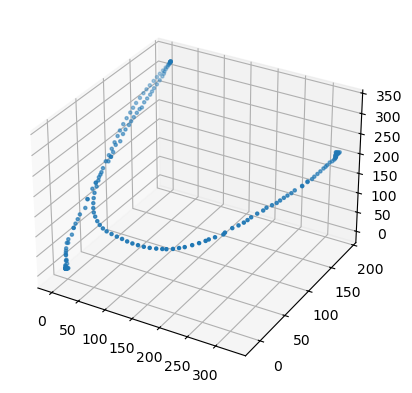

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
# ax.scatter(*cam_pos[0,:3], c='red', marker='o')
ax.scatter(poses[:,0,3], poses[:,1,3], poses[:,2,3], marker='.')
plt.show()

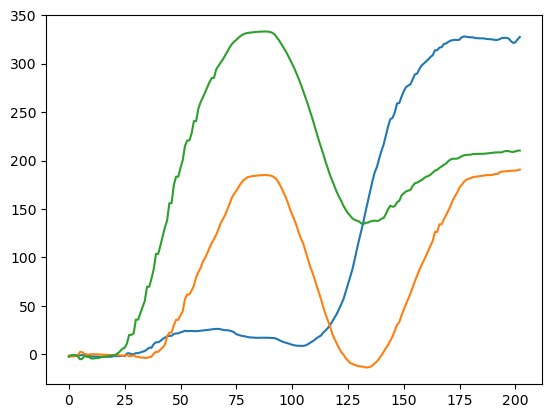

In [17]:
plt.plot(poses[:,:3,3])
plt.show()

In [ ]:
pose_confidences = f['poses'].attrs['pose_confidences']

cam_pos =  poses[:,:3,3]

color = [str(i/100) for i in pose_confidences]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(*cam_pos[0,:3], c='red', marker='o')
ax.scatter(cam_pos[:,0], cam_pos[:,1], cam_pos[:,2], c=color, marker='.')

plt.show()
